In [2]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sqlalchemy import create_engine, MetaData, select
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
# Define database connection parameters
database_params = {
    'user': 'postgres',                   # Update with individual user name
    'password': 'Connor1818!',            # update with individual password
    'host': 'localhost',
    'port': '5432',
    'database': 'CreditCardTransactions'  # Update with your actual database name
}

# Construct the connection string
connection_string = f"postgresql://{database_params['user']}:{database_params['password']}@{database_params['host']}:{database_params['port']}/{database_params['database']}"

# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Define the table name
table_name = 'creditcardtransactions'

# Query all data from the table into a pandas DataFrame
query = f'SELECT * FROM {table_name}'
df = pd.read_sql(query, engine)

# Display the DataFrame
display(df.head())

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
# Display data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   v1      568630 non-null  float64
 2   v2      568630 non-null  float64
 3   v3      568630 non-null  float64
 4   v4      568630 non-null  float64
 5   v5      568630 non-null  float64
 6   v6      568630 non-null  float64
 7   v7      568630 non-null  float64
 8   v8      568630 non-null  float64
 9   v9      568630 non-null  float64
 10  v10     568630 non-null  float64
 11  v11     568630 non-null  float64
 12  v12     568630 non-null  float64
 13  v13     568630 non-null  float64
 14  v14     568630 non-null  float64
 15  v15     568630 non-null  float64
 16  v16     568630 non-null  float64
 17  v17     568630 non-null  float64
 18  v18     568630 non-null  float64
 19  v19     568630 non-null  float64
 20  v20     568630 non-null  float64
 21  v21     56

In [5]:
# Cleaning

# Convert non-float values to NaN
learning_df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows containing NaN values
learning_df = learning_df.dropna()

# Display the resulting DataFrame
print(learning_df.head())

   id        v1        v2        v3        v4        v5        v6        v7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         v8        v9  ...       v21       v22       v23       v24       v25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        v26       v27       v28    amount  c

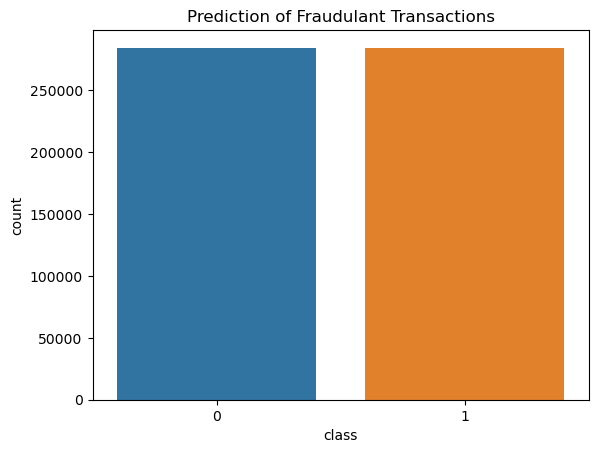

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56734
           1       1.00      1.00      1.00     56992

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

[[56669    65]
 [  122 56870]]


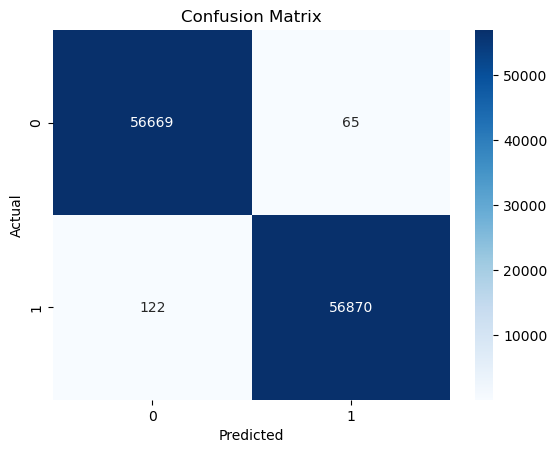

In [11]:
# Check the distribution of the target variable (class)
sns.countplot(x = 'class', data = creditcard_df)
plt.title('Prediction of Fraudulant Transactions')
plt.show()

# Split the data into features (X) and target variable (y)
X = creditcard_df.drop('class', axis = 1)
y = creditcard_df['class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

# Build a logistic regression model
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Create a Scatter plot for different perspective

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of the two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', alpha=0.6)
plt.title('Scatter plot of Credit Card Transactions (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', loc='upper right')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Model 1 - Report Explained

Precision: Precision measures the accuracy of the positive predictions made by the model. For class 0, it indicates the proportion of correctly predicted instances among all instances predicted as class 0. Similarly, for class 1, it represents the proportion of correctly predicted instances among all instances predicted as class 1. In this report, both classes have a precision of 1.00, indicating that all positive predictions made by the model were correct.

Recall: Recall, also known as sensitivity, measures the ability of the model to capture all positive instances of the class. For class 0, it represents the proportion of correctly predicted instances of class 0 among all actual instances of class 0. Similarly, for class 1, it indicates the proportion of correctly predicted instances of class 1 among all actual instances of class 1. Like precision, both classes have a recall of 1.00, indicating that the model correctly identified all instances of both classes.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is particularly useful when the classes are imbalanced. Like precision and recall, the F1-score ranges from 0 to 1, with higher values indicating better performance. In this report, both classes have an F1-score of 1.00, indicating perfect balance between precision and recall.

Support: Support represents the number of actual occurrences of each class in the dataset. For class 0, there are 56,734 instances, and for class 1, there are 56,992 instances.

Accuracy: Accuracy measures the overall correctness of the model's predictions across all classes. In this case, the model achieved an accuracy of 1.00, indicating that all predictions, both positive and negative, were correct.

Additionally, the confusion matrix provided at the end of the report summarizes the model's predictions. In this case, the model made 56,669 correct predictions for class 0 and 56,870 correct predictions for class 1. It incorrectly classified 65 instances of class 0 as class 1 and 122 instances of class 1 as class 0.
